In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
def choose_best_tresh(data_syn) -> pd.DataFrame:
    
    best_mean = 0
    df_best = None
    treshoulds = data_syn.THRE.unique()
    
    for tresh in treshoulds:
        
        df_tresh = data_syn[data_syn['THRE'] == tresh]
        
        mean_f1 = df_tresh.F1.mean()
        
        if mean_f1 > best_mean:
            best_mean = mean_f1
            df_best = df_tresh
            
    print(f'Best F1: {best_mean} - best Tresh: {df_best.THRE.unique()}')
    print(f'Describe DF')
    print(f'{df_best.describe()}')

    return df_best

In [4]:

def plot(df, name):
    
    fig, axs = plt.subplots(1,1)# figsize=(8, 4)
    
    sns.barplot(x="model_name", y="F1", data=df, orient="v", capsize=.2,
                ax = axs,
                     estimator=mean, palette=['#A1CAE2', '#F39189', '#9A86A4', '#E2C2B9',
                                              '#FF8AAE', '#F6AE99', '#BB6464', '#555555'])
    axs.set_xticklabels(axs.get_xticklabels(), 
                            rotation=60, 
                            horizontalalignment='right')
    axs.set(xlabel='')

    #fig = ax.get_figure()
    plt.savefig(name +  '_bar.svg', bbox_inches='tight', dpi=300) 

    #plt.savefig(name +  '_bar.svg', dpi=300)
    plt.show()

In [16]:
path_results = '../results/all-results/'
path_results_synclass = '../results/results-synclass-dt/'
path_plots = 'plots_bar_roc/'

## A_thrombosis_non_thrombosis_v5

Best F1: 0.7024797575905681 - best Tresh: [0.01]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC   THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  50.00
mean    0.702480   0.707407     0.667273     0.775728   0.756804   0.01
std     0.031396   0.029930     0.030011     0.033768   0.030264   0.00
min     0.659187   0.666667     0.628571     0.708333   0.713992   0.01
25%     0.679805   0.685185     0.647059     0.750000   0.733025   0.01
50%     0.700000   0.703704     0.666667     0.767316   0.752058   0.01
75%     0.717475   0.722222     0.676471     0.800000   0.768861   0.01
max     0.776552   0.777778     0.741935     0.857143   0.842936   0.01


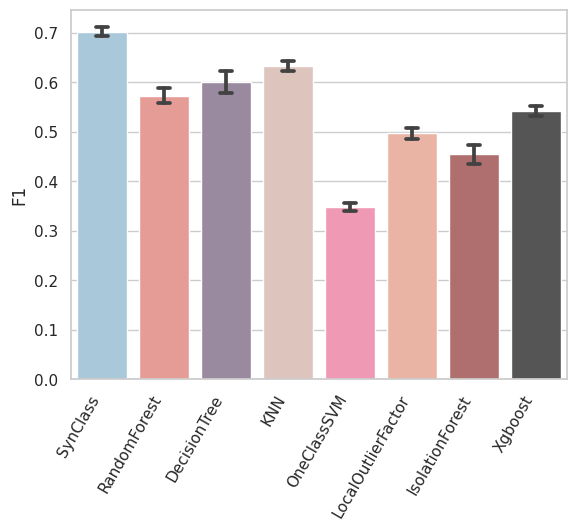

In [11]:
dset = 'A_thrombosis_non_thrombosis_v5'
test_size = 0.2
test_size_synclass = 0.2
dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size_synclass}.csv')

#df_model = dataf_synclass[dataf_synclass['THRE'] == 0.17]
df_model = choose_best_tresh(dataf_synclass)

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')

dataf_concat = pd.concat([df_model, dataf])
plot(dataf_concat, f'{path_plots}{dset}_{test_size_synclass}')

Best F1: 0.6958891417667278 - best Tresh: [0.17]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC   THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  50.00
mean    0.695889   0.712857     0.911847     0.644355   0.741814   0.17
std     0.025897   0.027385     0.087622     0.015023   0.037026   0.00
min     0.646635   0.666667     0.733333     0.612903   0.681406   0.17
25%     0.675579   0.690476     0.833333     0.633333   0.712018   0.17
50%     0.697115   0.714286     0.909091     0.645161   0.736961   0.17
75%     0.718807   0.738095     1.000000     0.656250   0.775510   0.17
max     0.747596   0.761905     1.000000     0.677419   0.817460   0.17


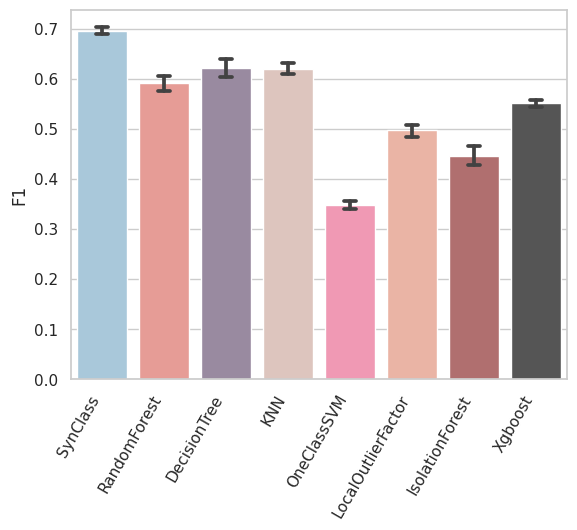

In [12]:
dset = 'A_thrombosis_non_thrombosis_v5'
test_size = 0.15
dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')

test_size_synclass = 0.15
dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size_synclass}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size_synclass}')

Best F1: 0.6321472547845184 - best Tresh: [0.05]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  5.000000e+01
mean    0.632147   0.636429     0.613047     0.673210   0.661633  5.000000e-02
std     0.031635   0.031193     0.026881     0.040837   0.036186  1.401868e-17
min     0.602581   0.607143     0.588235     0.636364   0.589286  5.000000e-02
25%     0.602581   0.607143     0.588235     0.636364   0.635842  5.000000e-02
50%     0.635417   0.642857     0.611111     0.666667   0.653061  5.000000e-02
75%     0.641026   0.642857     0.625000     0.700000   0.678571  5.000000e-02
max     0.712821   0.714286     0.687500     0.800000   0.752551  5.000000e-02


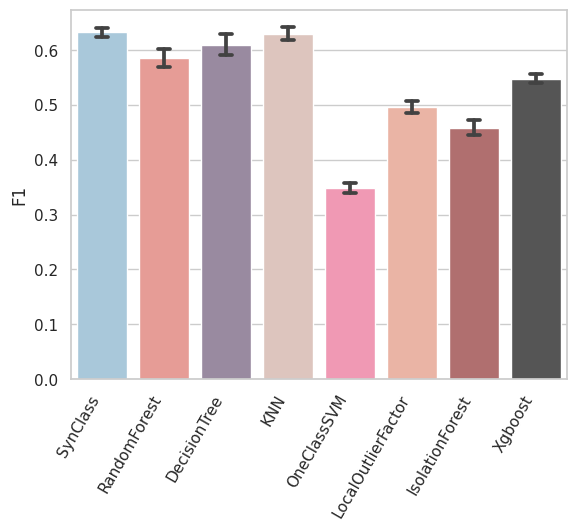

In [13]:
dset = 'A_thrombosis_non_thrombosis_v5'
test_size = 0.10
dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

In [9]:
test_size = 0.25
dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

Best F1: 0.6534763299910732 - best Tresh: [0.05]


## B_type_I_PE_vs_Type_II_v4

Best F1: 0.6575714285714284 - best Tresh: [0.31]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000         50.0    50.000000  50.000000  5.000000e+01
mean    0.657571   0.693333          1.0     0.624000   0.661111  3.100000e-01
std     0.075388   0.061721          0.0     0.055549   0.062744  5.607473e-17
min     0.625000   0.666667          1.0     0.600000   0.500000  3.100000e-01
25%     0.625000   0.666667          1.0     0.600000   0.666667  3.100000e-01
50%     0.625000   0.666667          1.0     0.600000   0.666667  3.100000e-01
75%     0.625000   0.666667          1.0     0.600000   0.666667  3.100000e-01
max     0.828571   0.833333          1.0     0.750000   0.777778  3.100000e-01


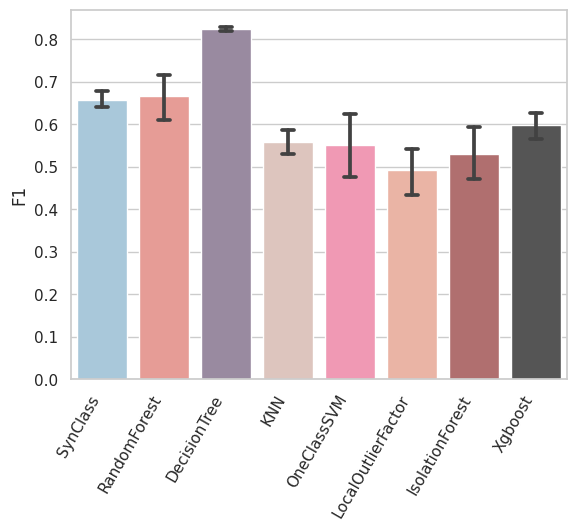

In [18]:
dset = 'B_type_I_PE_vs_Type_II_v4'
test_size = 0.10

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.7598412698412699 - best Tresh: [0.11]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  5.000000e+01
mean    0.759841   0.760000     0.770000     0.754000   0.786875  1.100000e-01
std     0.033712   0.034256     0.068512     0.013702   0.021586  1.401868e-17
min     0.750000   0.750000     0.750000     0.750000   0.750000  1.100000e-01
25%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
50%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
75%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
max     0.873016   0.875000     1.000000     0.800000   0.843750  1.100000e-01


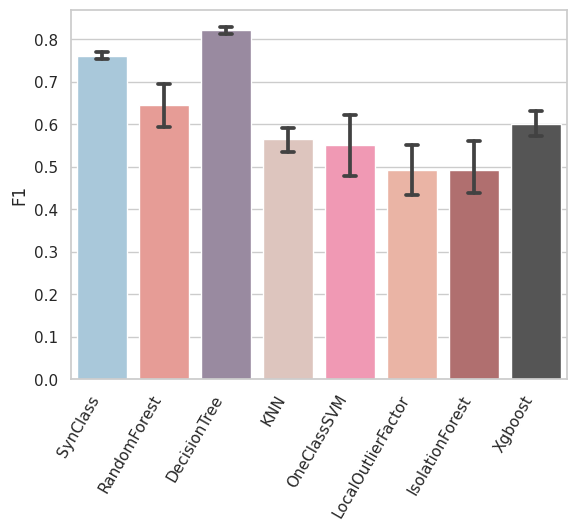

In [19]:
dset = 'B_type_I_PE_vs_Type_II_v4'
test_size = 0.15

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.789772727272727 - best Tresh: [0.11]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  5.000000e+01
mean    0.789773   0.798000     0.995000     0.713333   0.758400  1.100000e-01
std     0.013392   0.014142     0.035355     0.006734   0.011314  1.401868e-17
min     0.696970   0.700000     0.750000     0.666667   0.680000  1.100000e-01
25%     0.791667   0.800000     1.000000     0.714286   0.760000  1.100000e-01
50%     0.791667   0.800000     1.000000     0.714286   0.760000  1.100000e-01
75%     0.791667   0.800000     1.000000     0.714286   0.760000  1.100000e-01
max     0.791667   0.800000     1.000000     0.714286   0.760000  1.100000e-01


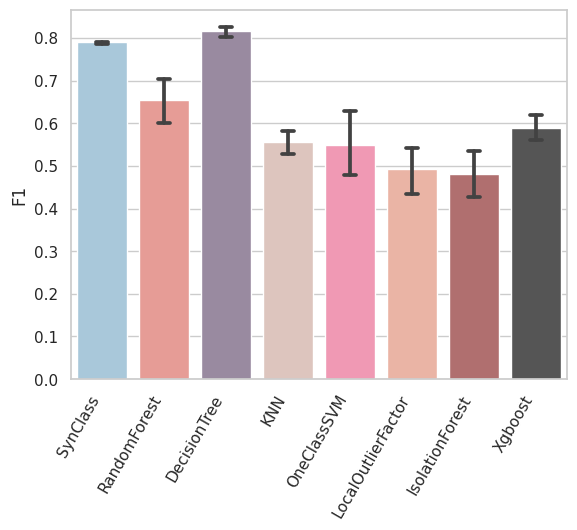

In [20]:
dset = 'B_type_I_PE_vs_Type_II_v4'
test_size = 0.2

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

In [13]:
test_size = 0.25
dset = 'B_type_I_PE_vs_Type_II_v4'
dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

Best F1: 0.7479533799533797 - best Tresh: [0.01]


## C_type_I_vs_Type_II_no_PE_v4

Best F1: 0.6752380952380951 - best Tresh: [0.1]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  5.000000e+01
mean    0.675238   0.676667     0.696667     0.666667   0.647778  1.000000e-01
std     0.071690   0.070711     0.119949     0.050508   0.063104  1.401868e-17
min     0.485714   0.500000     0.500000     0.500000   0.444444  1.000000e-01
25%     0.666667   0.666667     0.666667     0.666667   0.611111  1.000000e-01
50%     0.666667   0.666667     0.666667     0.666667   0.611111  1.000000e-01
75%     0.666667   0.666667     0.666667     0.666667   0.708333  1.000000e-01
max     0.828571   0.833333     1.000000     0.750000   0.777778  1.000000e-01


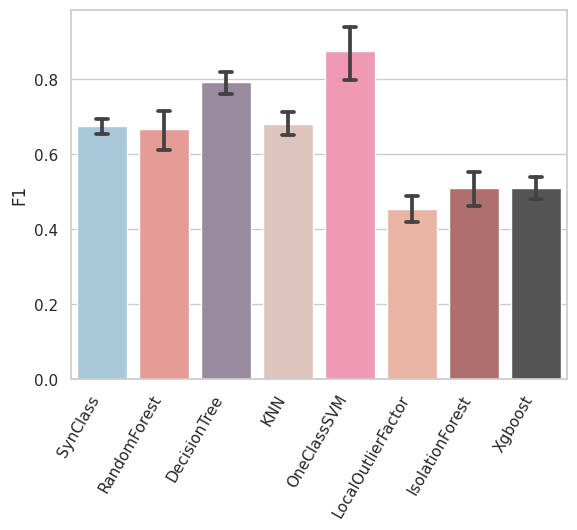

In [21]:
dset = 'C_type_I_vs_Type_II_no_PE_v4'
test_size = 0.1

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.7647619047619049 - best Tresh: [0.11]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  5.000000e+01
mean    0.764762   0.765000     0.780000     0.756000   0.788750  1.100000e-01
std     0.040381   0.041033     0.082065     0.016413   0.020516  1.401868e-17
min     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
25%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
50%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
75%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
max     0.873016   0.875000     1.000000     0.800000   0.843750  1.100000e-01


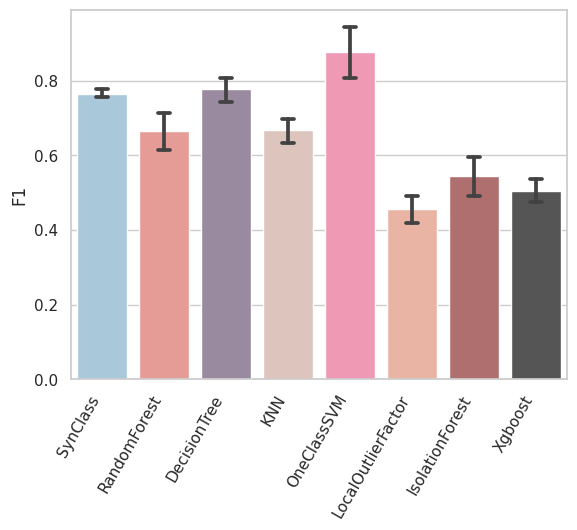

In [22]:
dset = 'C_type_I_vs_Type_II_no_PE_v4'
test_size = 0.15

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.8948636363636363 - best Tresh: [0.11]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  5.000000e+01
mean    0.894864   0.896000     0.996000     0.830286   0.875600  1.100000e-01
std     0.020437   0.019795     0.028284     0.017391   0.021868  1.401868e-17
min     0.791667   0.800000     0.800000     0.714286   0.760000  1.100000e-01
25%     0.898990   0.900000     1.000000     0.833333   0.880000  1.100000e-01
50%     0.898990   0.900000     1.000000     0.833333   0.880000  1.100000e-01
75%     0.898990   0.900000     1.000000     0.833333   0.880000  1.100000e-01
max     0.898990   0.900000     1.000000     0.833333   0.880000  1.100000e-01


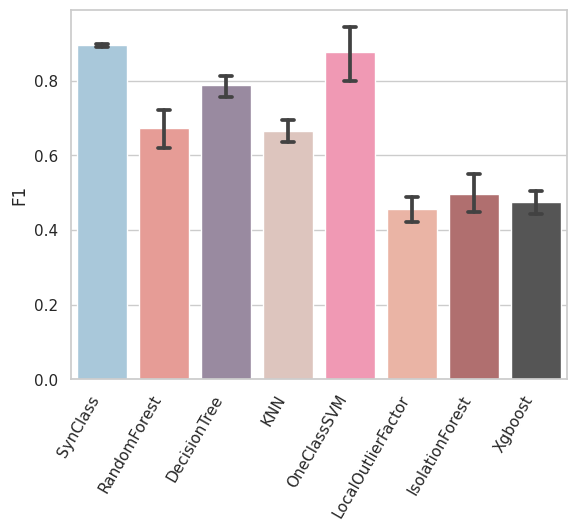

In [23]:
dset = 'C_type_I_vs_Type_II_no_PE_v4'
test_size = 0.2

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

In [17]:
test_size = 0.25

dset = 'C_type_I_vs_Type_II_no_PE_v4'
dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

Best F1: 0.8331428571428572 - best Tresh: [0.01]


## D_type_I_vs_type_II_v4

Best F1: 0.6982857142857144 - best Tresh: [0.31]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000         50.0    50.000000  50.000000  5.000000e+01
mean    0.698286   0.726667          1.0     0.654000   0.678889  3.100000e-01
std     0.098706   0.080812          0.0     0.072731   0.064759  5.607473e-17
min     0.625000   0.666667          1.0     0.600000   0.500000  3.100000e-01
25%     0.625000   0.666667          1.0     0.600000   0.666667  3.100000e-01
50%     0.625000   0.666667          1.0     0.600000   0.666667  3.100000e-01
75%     0.828571   0.833333          1.0     0.750000   0.722222  3.100000e-01
max     0.828571   0.833333          1.0     0.750000   0.777778  3.100000e-01


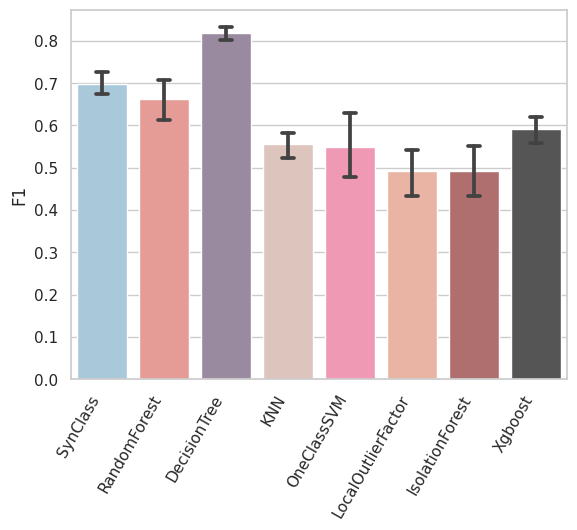

In [25]:
dset = 'D_type_I_vs_type_II_v4_roc'
test_size = 0.1

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.7573809523809524 - best Tresh: [0.11]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC          THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  5.000000e+01
mean    0.757381   0.757500     0.765000     0.753000   0.786875  1.100000e-01
std     0.029511   0.029987     0.059974     0.011995   0.019653  1.401868e-17
min     0.750000   0.750000     0.750000     0.750000   0.750000  1.100000e-01
25%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
50%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
75%     0.750000   0.750000     0.750000     0.750000   0.781250  1.100000e-01
max     0.873016   0.875000     1.000000     0.800000   0.843750  1.100000e-01


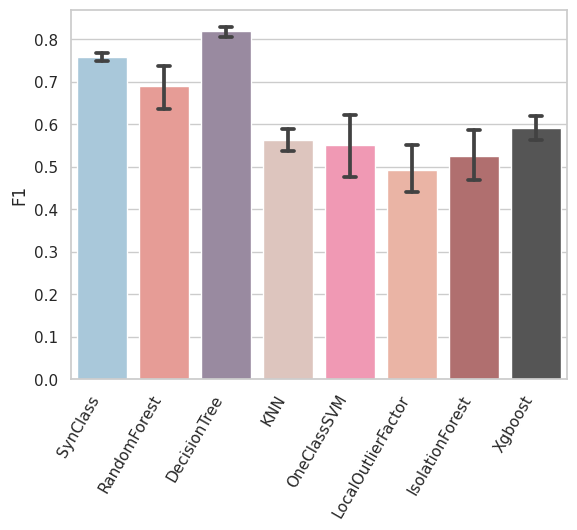

In [26]:
dset = 'D_type_I_vs_type_II_v4_roc'
test_size = 0.15

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

Best F1: 0.7916666666666664 - best Tresh: [0.11]
Describe DF
                 F1           ROC  acc-class-1  acc-class-2           AUC  \
count  5.000000e+01  5.000000e+01         50.0    50.000000  5.000000e+01   
mean   7.916667e-01  8.000000e-01          1.0     0.714286  7.600000e-01   
std    1.121495e-16  2.242989e-16          0.0     0.000000  1.121495e-16   
min    7.916667e-01  8.000000e-01          1.0     0.714286  7.600000e-01   
25%    7.916667e-01  8.000000e-01          1.0     0.714286  7.600000e-01   
50%    7.916667e-01  8.000000e-01          1.0     0.714286  7.600000e-01   
75%    7.916667e-01  8.000000e-01          1.0     0.714286  7.600000e-01   
max    7.916667e-01  8.000000e-01          1.0     0.714286  7.600000e-01   

               THRE  
count  5.000000e+01  
mean   1.100000e-01  
std    1.401868e-17  
min    1.100000e-01  
25%    1.100000e-01  
50%    1.100000e-01  
75%    1.100000e-01  
max    1.100000e-01  


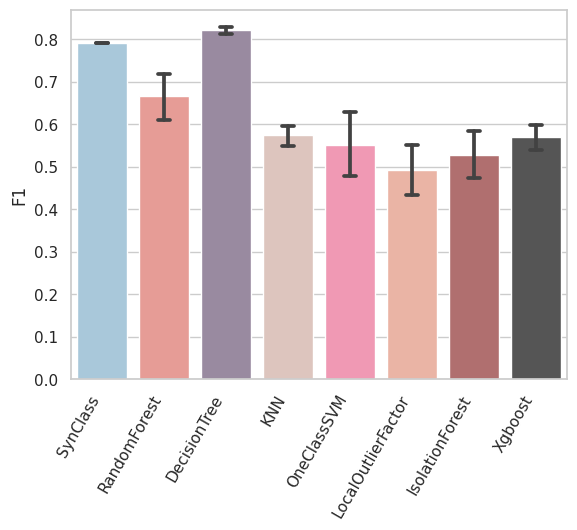

In [27]:
dset = 'D_type_I_vs_type_II_v4_roc'
test_size = 0.2

dataf = pd.read_csv(f'{path_results}{dset}_{test_size}.csv')


dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

dataf_concat = pd.concat([df_model, dataf])

plot(dataf_concat, f'{path_plots}{dset}_{test_size}')

In [28]:
test_size = 0.25

dset = 'D_type_I_vs_type_II_v4_roc'

dataf_synclass = pd.read_csv(f'{path_results_synclass}{dset}_{test_size}.csv')
df_model = choose_best_tresh(dataf_synclass)

Best F1: 0.7446899766899765 - best Tresh: [0.01]
Describe DF
              F1        ROC  acc-class-1  acc-class-2        AUC   THRE
count  50.000000  50.000000    50.000000    50.000000  50.000000  50.00
mean    0.744690   0.746667     0.798667     0.711429   0.787500   0.01
std     0.016226   0.016496     0.039245     0.011424   0.017354   0.00
min     0.666667   0.666667     0.666667     0.666667   0.708333   0.01
25%     0.748252   0.750000     0.800000     0.714286   0.791667   0.01
50%     0.748252   0.750000     0.800000     0.714286   0.791667   0.01
75%     0.748252   0.750000     0.800000     0.714286   0.791667   0.01
max     0.748252   0.750000     1.000000     0.714286   0.791667   0.01
